<a href="https://colab.research.google.com/github/Herdvair/Tasks/blob/main/Exploration_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as py
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,shapiro
import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Dataset dan Feature Engineering

In [ ]:
df_ecommerce = pd.read_csv('ecommerce.csv')

In [ ]:
df_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [ ]:
df_ecommerce.shape

(4870, 8)

In [ ]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


In [ ]:
df_ecommerce.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,4870.000000,4870.000000,4870.000000,4870.000000
mean,560586.577413,12.945791,2.937057,15291.004312
std,13211.347819,38.145988,4.744515,1709.035002
min,536365.000000,1.000000,0.040000,12347.000000
25%,548861.000000,2.000000,1.250000,13975.000000
50%,561895.000000,5.000000,1.950000,15144.000000
75%,572126.000000,12.000000,3.750000,16793.250000
max,581585.000000,992.000000,145.000000,18283.000000


In [ ]:
data = df_ecommerce.copy()

## Handling duplicate

In [ ]:
len(data.drop_duplicates())/len(data)

1.0

**Tidak ada data duplikat**

## Missing Values Checking and Handling

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
for col in data.columns:
    print(f"---{col}---")
    print(data[col].value_counts())
    display()

---InvoiceNo---
562046    8
575491    7
578270    7
576339    7
570488    6
559552    6
567656    6
554275    6
563924    5
579196    5
579516    5
553035    5
570672    5
537137    5
580727    5
571909    5
553067    5
578068    5
565766    5
568346    5
571039    5
570818    5
575152    4
571653    4
569803    4
560444    4
576053    4
572103    4
546851    4
569653    4
580527    4
545690    4
558237    4
575607    4
544790    4
576857    4
579446    4
577504    4
563076    4
567170    4
545530    4
562031    4
556056    4
574481    4
572741    4
569669    4
578045    4
551531    4
544316    4
537144    4
568066    4
574714    4
572669    4
571046    4
537868    4
566290    4
577029    4
571883    4
554098    4
560271    4
544450    4
580136    4
566495    4
556102    3
538255    3
573029    3
579188    3
554645    3
544462    3
569894    3
562539    3
550193    3
573904    3
578995    3
562213    3
577052    3
556245    3
548711    3
566847    3
547906    3
560723    3
581173    3


Setelah dilakukan identifikasi nilai yang tidak sesuai, terdapat di kolom **StockCode** yaitu (POST,M,C2) dan kolom **Country** yaitu (Unspecified).

In [ ]:
# menghitung persentase missing value di kolom (Stock code)
100 * len(df_ecommerce[(df_ecommerce['StockCode'].isin(["POST", "M", "C2"])) | (df_ecommerce['StockCode'].isna())]) / len(df_ecommerce)

0.4106776180698152

In [ ]:
# menghitung persentase missing value di kolom (Country)
100 * len(df_ecommerce[(df_ecommerce['Country'] == 'Unspecified') | (df_ecommerce['Country'].isna())]) / len(df_ecommerce)

0.08213552361396304

### Handling Missing Values for EDA

#### Kolom Stock Code

Persentase missing value yang dihasilkan untuk kolom **StockCode** adalah 0.4106. Karena persentasenya masih dibawah 20% maka dilakukan handling missing value saja.

In [ ]:
mode_sc = data[~data['StockCode'].isin(["POST", "M", "C2"])]['StockCode'].mode()[0]
mode_sc

'85099B'

In [ ]:
data['StockCode'] = data['StockCode'].apply(lambda x: mode_sc if x in ["POST", "M", "C2"] else x)

In [ ]:
# menghitung persentase missing value di kolom (Stock code)
100 * len(data[(data['StockCode'].isin(["POST", "M", "C2"])) | (data['StockCode'].isna())]) / len(data)

0.0

No Missing Values!

#### Kolom country

Persentase missing value yang dihasilkan untuk kolom **Country** adalah 0.08213. Meskipun masih kecil namun memengaruhi akan kualitas data. Oleh karena itu dihandling saja.

In [ ]:
mode_country = data[~data['Country'].isin(["Unspecified"])]['Country'].mode()[0]
mode_country

'United Kingdom'

In [ ]:
data['Country'] = data['Country'].apply(lambda x: mode_country if x in ["Unspecified"] else x)

In [ ]:
# menghitung persentase missing value di kolom (country)
100 * len(data[(data['Country'].isin(["Unspecified"])) | (data['Country'].isna())]) / len(data)

0.0

No Missing Values!

## Handling Outlier

In [ ]:
features = ['InvoiceNo','Quantity','UnitPrice','CustomerID']

### cek outlier di Histogram, plot Q-Q dan boxplot

In [ ]:
def check_plot(df_ecommerce,features):

    for i in features:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df_ecommerce[i], bins=30)
        plt.title('Histogram')

    # plot Q-Q
        plt.subplot(1, 3, 2)
        stats.probplot(df_ecommerce[i], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

    # box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=df_ecommerce[i])
        plt.title('Boxplot')

        plt.show()


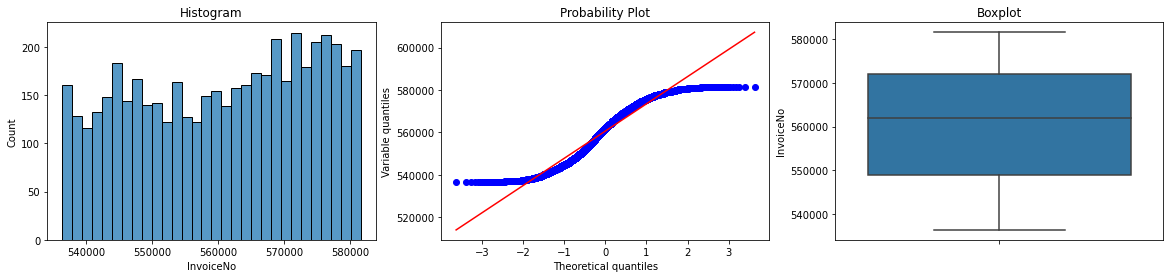

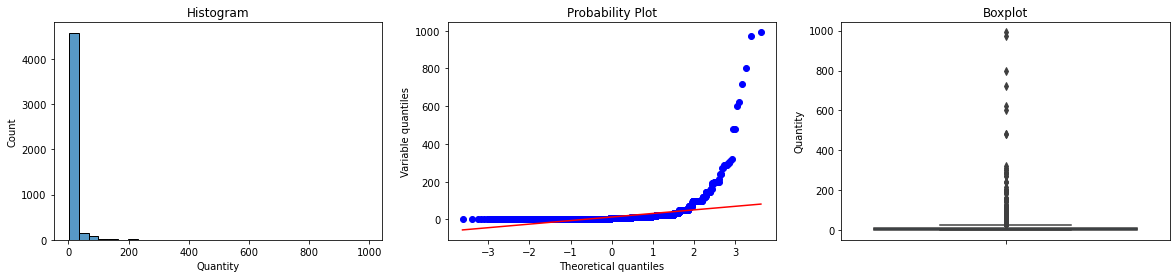

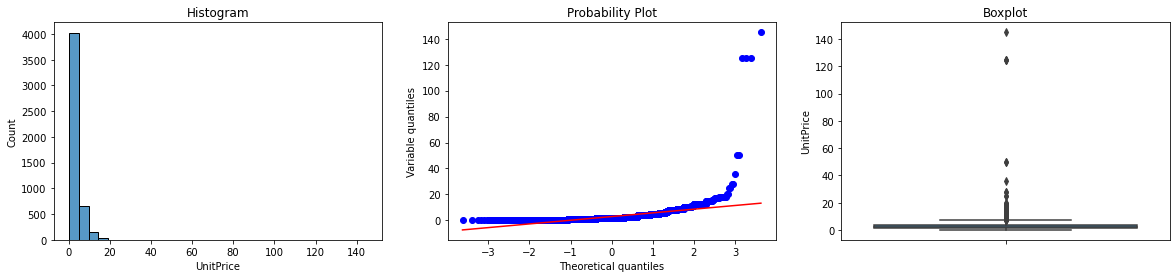

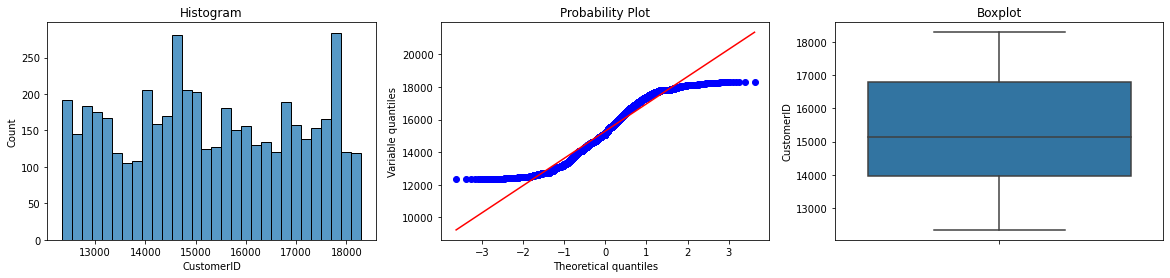

In [ ]:
check_plot(df_ecommerce, features)

Terdapat outlier pada kolom **UnitPrice** dan **Quantity** jadi kita harus melakukan handling outlier

#### Handling Outlier

In [ ]:
def find_outlier_boundary(data,variabel):

    IQR = data[variabel].quantile(0.75) - data[variabel].quantile(0.25)

    lower_boundary = data[variabel].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data[variabel].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
full_occup_upper_limit, full_occup_lower_limit = find_outlier_boundary(data, ['Quantity','UnitPrice'])
print(f"upper limit : \n{full_occup_upper_limit}")
print(f"lower limit : \n{full_occup_lower_limit}")

upper limit : 
Quantity     27.0
UnitPrice     7.5
dtype: float64
lower limit : 
Quantity    -13.0
UnitPrice    -2.5
dtype: float64


In [ ]:
# Trimming atau drop value outlier -> pengurangan baris
data = data[
    (data['Quantity'] <= full_occup_upper_limit['Quantity']) & (data['Quantity'] >= full_occup_lower_limit['Quantity']) &
    (data['UnitPrice'] <= full_occup_upper_limit['UnitPrice']) & (data['UnitPrice'] >= full_occup_lower_limit['UnitPrice'])
]

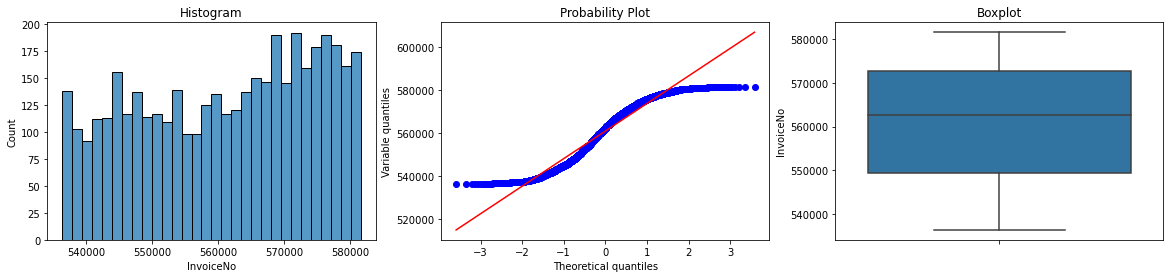

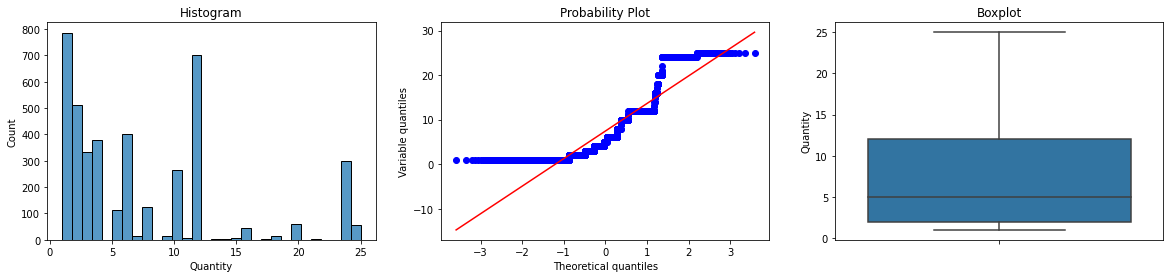

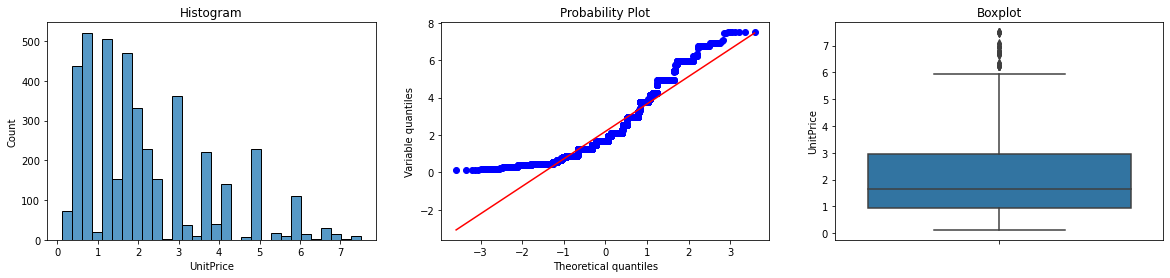

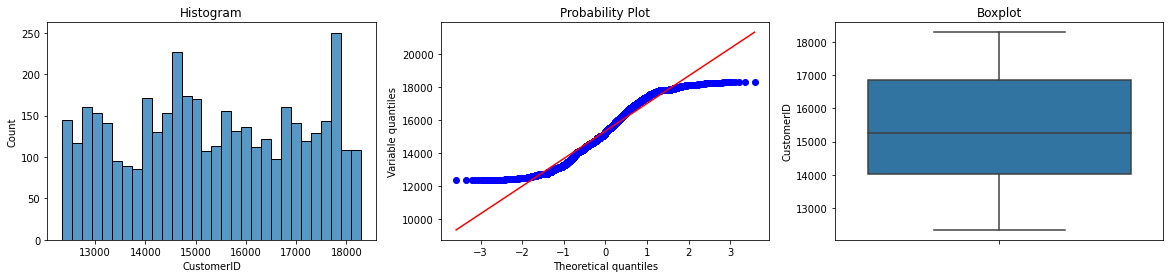

In [ ]:
check_plot(data, features)

Telah dilakukan timming pada outlier di kolom UnitPrice dan Quantity

### cek oulier di boxplot only

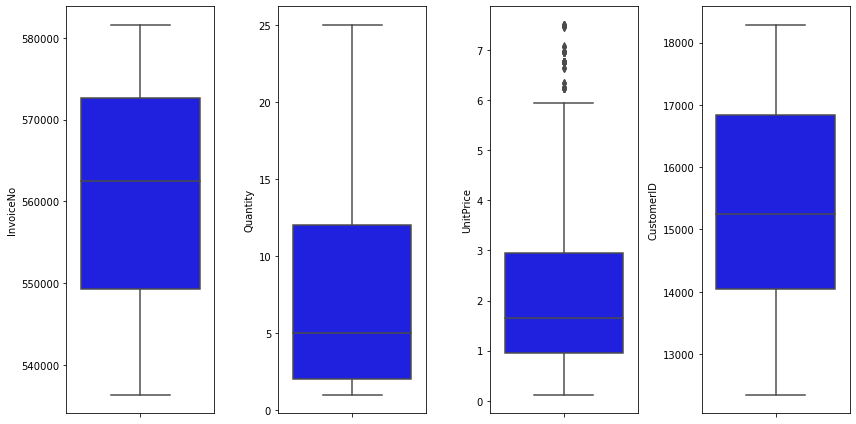

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue')
    plt.tight_layout()

# Insight Analysis

## Filtering

Produk apa yang sering dibeli di awal bulan?

In [ ]:
#ubah tipe data invoice date jadi datetime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"],format="%m/%d/%Y %H:%M")

In [ ]:
#filter pembelian di awal bulan (tetapkan dari tanggal 1 - 10)
awal_bulan = data[data['InvoiceDate'].dt.day <= 10]

In [ ]:
#hitung total kuantitas pembelian perproduk, lalu urutkan dari yang sering dibeli (jumlahj produk yang terjual)
produk_awal_bulan = awal_bulan.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
produk_awal_bulan.head()

,Description,Quantity
0,60 TEATIME FAIRY CAKE CASES,121
1,SET OF 4 PANTRY JELLY MOULDS,81
2,VICTORIAN GLASS HANGING T-LIGHT,66
3,RED RETROSPOT CHARLOTTE BAG,66
4,JAM MAKING SET PRINTED,63


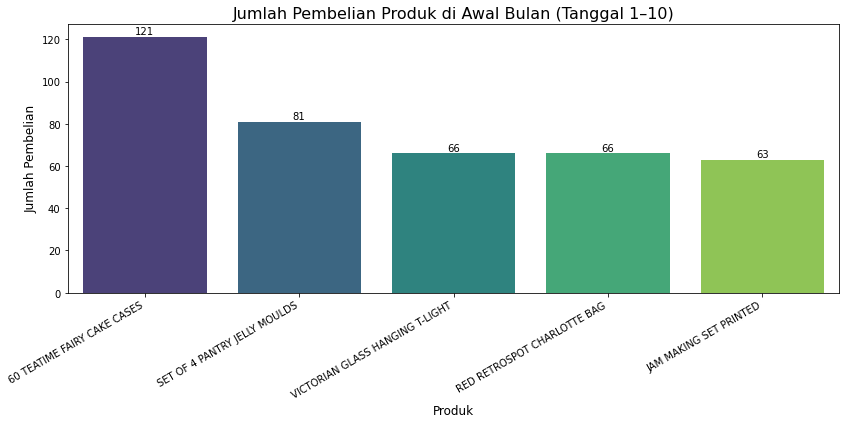

In [ ]:
top_5_produk = produk_awal_bulan.head()
plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='Quantity', data=top_5_produk, palette='viridis')

# Tambahkan angka di atas bar
for i, qty in enumerate(top_5_produk['Quantity']):
    plt.text(i, qty + (0.01 * top_5_produk['Quantity'].max()), f"{qty:,.0f}",
             ha='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Jumlah Pembelian Produk di Awal Bulan (Tanggal 1–10)', fontsize=16)
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Observation :
Produk yang sering dibeli dalam segi kuantitas oleh pelanggan pada awal bulan adalah 60 Teatime Fairy Cake Cases dengan jumlah quantity 121 produk. Karena produk ini paling laris di awal bulan, maka disarankan untuk memperbanyak stok produk tersebut menjelang awal bulan.

## Sorting

Pelanggan mana saja kah yang memiliki jumlah belanja yang terbanyak?

In [ ]:
data['UnitPrice'].mean()

2.186824324324315

In [ ]:
data['Total_Belanja'] = data['Quantity'] * data['UnitPrice']

In [ ]:
belanja_per_pelanggan = data.groupby('CustomerID')['Total_Belanja'].sum().reset_index()

In [ ]:
top_5_pelanggan = belanja_per_pelanggan.nlargest(5, 'Total_Belanja')

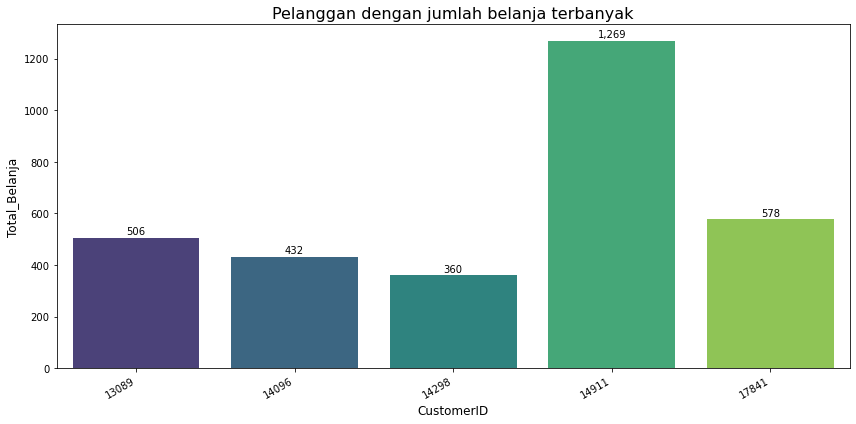

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='CustomerID', y='Total_Belanja', data=top_5_pelanggan, palette='viridis')

# Tambahkan label di atas batang
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = f"{y:,.0f}"
    ax.text(x, y + (0.01 * top_5_pelanggan['Total_Belanja'].max()), label, ha='center', fontsize=10, color='black')

plt.title('Pelanggan dengan jumlah belanja terbanyak', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total_Belanja', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Observasi :
Pelanggan dengan ID 14646 sebagai pelanggan yang memiliki jumlah belanja terbanyak, pelanggan tersebut loyal terhadap pembelian produk yang ada di e-commerce. Mungkin pelanggan yang loyal terhadap platform ini bisa kita berikan diskon, atau informasi untuk kupon atau reward lainnya.

## GROUP BY

Berapa banyak transaksi yang terjadi tiap bulan?

In [ ]:
df_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [ ]:
def konversi_nama_bulan(x):
    if x == 1:
        return 'januari'
    elif x == 2:
        return 'februari'
    elif x == 3:
        return 'maret'
    elif x == 4:
        return 'april'
    elif x == 5:
        return 'mei'
    elif x == 6:
        return 'juni'
    elif x == 7:
        return 'juli'
    elif x == 8:
        return 'agust'
    elif x == 9:
        return 'sept'
    elif x == 10:
        return 'okt'
    elif x == 11:
        return 'nov'
    else:
        return 'desember'

In [ ]:
data['Bulan'] = data["InvoiceDate"].dt.month

In [ ]:
data['month'] = data['Bulan'].apply(konversi_nama_bulan)

In [ ]:
transaksi_per_bulan = data.groupby('month')['InvoiceNo'].nunique().reset_index() #menghitung transaksi yang berbeda

In [ ]:
transaksi_per_bulan.columns = ['month', 'Banyaknya_Transaksi']
#mengubah nama invoiceNo jadi jumlah_transaksi agar mudah untuk dipahami, namun tidak mengubah struktur datafrme

In [ ]:
transaksi_per_bulan = transaksi_per_bulan.sort_values(by='Banyaknya_Transaksi', ascending=False)

In [ ]:
transaksi_per_bulan

,month,Banyaknya_Transaksi
9,nov,543
10,okt,386
2,desember,359
11,sept,336
7,maret,235
8,mei,235
5,juli,226
0,agust,213
6,juni,196
1,april,191


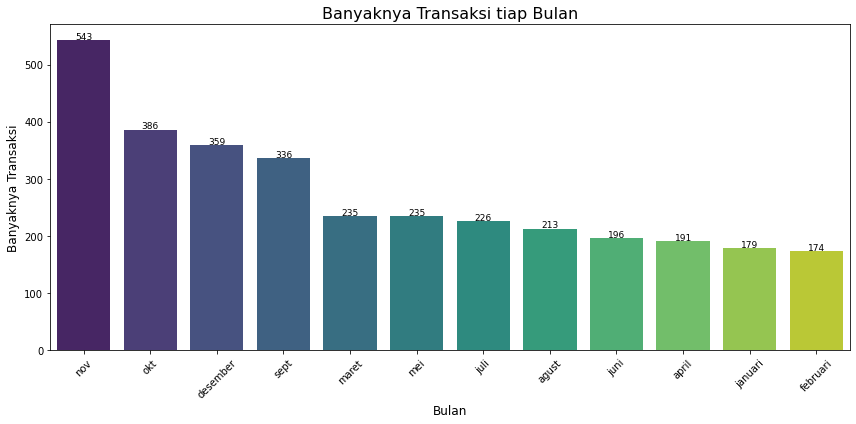

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Banyaknya_Transaksi', data=transaksi_per_bulan, palette='viridis')

# Tambahkan label di atas batang
for i, qty in enumerate(transaksi_per_bulan['Banyaknya_Transaksi']):
    plt.text(i, qty + 2, str(qty), ha='center', fontsize=9)

plt.title('Banyaknya Transaksi tiap Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Banyaknya Transaksi', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observasi : <br>
Terdapat lebih dari 400 transaksi pada bulan November, Oktober, dan Desember di platform e-commerce. Bulan November mencatat jumlah transaksi tertinggi, yaitu 611, yang menandakan periode peak season belanja online. Hal ini menunjukkan potensi penting bagi bisnis dalam mempersiapkan stok, promosi, dan strategi pemasaran menjelang akhir tahun.

## Crosstab

Berapa banyak transaksi yang dilakukan dalam seminggu?

In [ ]:
data['Hari'] = data['InvoiceDate'].dt.day_name()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4144 entries, 0 to 4869
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      4144 non-null   int64         
 1   StockCode      4144 non-null   object        
 2   Description    4144 non-null   object        
 3   Quantity       4144 non-null   int64         
 4   InvoiceDate    4144 non-null   datetime64[ns]
 5   UnitPrice      4144 non-null   float64       
 6   CustomerID     4144 non-null   int64         
 7   Country        4144 non-null   object        
 8   Total_Belanja  4144 non-null   float64       
 9   Bulan          4144 non-null   int64         
 10  month          4144 non-null   object        
 11  Hari           4144 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 420.9+ KB


In [ ]:
tabel_transaksi_per_hari = pd.crosstab(data['Hari'], data['InvoiceNo'])

In [ ]:
jumlah_transaksi_per_hari = tabel_transaksi_per_hari.nunique(axis=1).sort_values(ascending=False)
jumlah_transaksi_per_hari.name= "Banyaknya_Transaksi"

In [ ]:
hasil = jumlah_transaksi_per_hari.reset_index()

In [ ]:
hasil

,Hari,Banyaknya_Transaksi
0,Monday,7
1,Sunday,7
2,Tuesday,7
3,Wednesday,7
4,Thursday,6
5,Friday,5


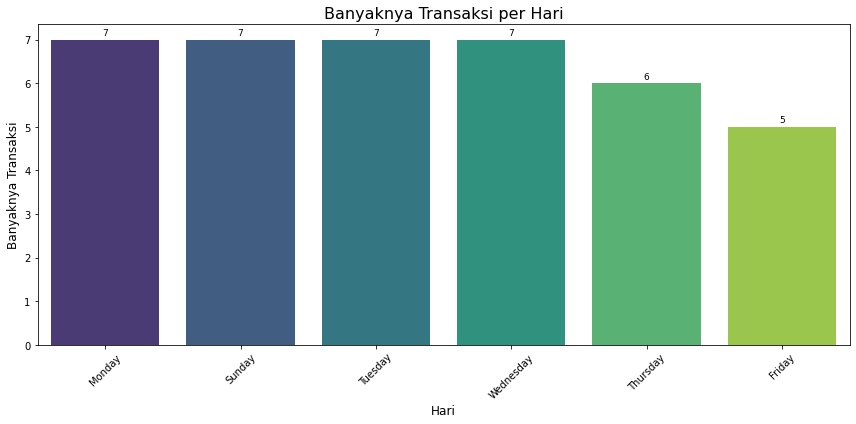

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Hari', y='Banyaknya_Transaksi', data=hasil, palette='viridis')

# Tambahkan label di atas batang
for i, qty in enumerate(hasil['Banyaknya_Transaksi']):
    plt.text(i, qty + 0.1, str(qty), ha='center', fontsize=9)

plt.title('Banyaknya Transaksi per Hari', fontsize=16)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Banyaknya Transaksi', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observasi : <br>
Berdasarkan grafik, tercatat hari senin dan rabu menjadi hari yang paling banyak melakukan transaksi pembelian produk dibandingkan hari yang lain.

## Pivot

Negara mana yang paling banyak transaksi di tahun tertentu?

In [ ]:
data['Tahun'] = data['InvoiceDate'].dt.year

In [ ]:
transaksi_tahun = data[['InvoiceNo', 'Country', 'Tahun']]

In [ ]:
pivot_tahun = pd.pivot_table(
    transaksi_tahun,
    index='Country',
    columns='Tahun',
    values='InvoiceNo',
    aggfunc='nunique',
    fill_value=0
)


In [ ]:
pivot_tahun

Tahun,2010,2011
Country,,
Australia,0,7
Austria,0,5
Belgium,0,16
Brazil,0,1
Canada,0,1
Channel Islands,0,6
Cyprus,0,3
Denmark,0,3
EIRE,3,54


In [ ]:
# Ambil nama negara dengan transaksi pada tahun tersebut
negara_terbanyak_per_tahun = pivot_tahun.idxmax(axis=1)

# Ambil jumlah transaksinya
jumlah_terbanyak_per_tahun = pivot_tahun.max(axis=1)

In [ ]:
hasil_tahun = pd.DataFrame({
    'Country': negara_terbanyak_per_tahun.index,
    'Tahun': negara_terbanyak_per_tahun.values,
    'Jumlah_Transaksi': jumlah_terbanyak_per_tahun.values
})


In [ ]:
hasil = hasil_tahun.nlargest(3, 'Jumlah_Transaksi')

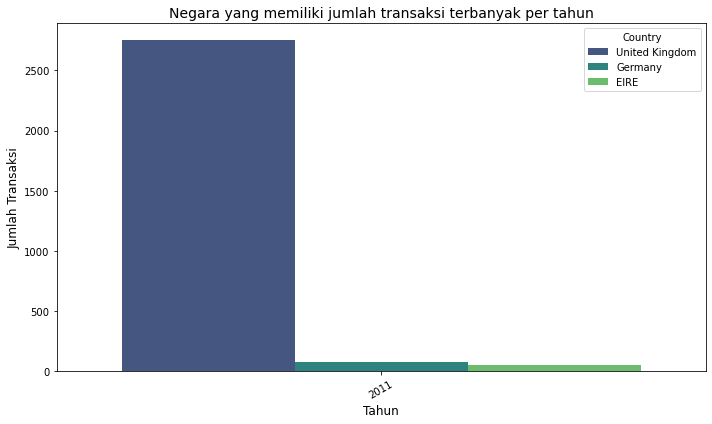

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=hasil,
    x='Tahun',
    y='Jumlah_Transaksi',
    hue='Country',
    palette='viridis'
)


plt.title('Negara yang memiliki jumlah transaksi terbanyak per tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.legend(title='Country')
plt.show()


Observasi : <br>
Berdasarkan grafik diatas, tercatat pada tahun 2011 memiliki jumlah transaksi terbanyak pada tahun itu dan negara United Kingdom sebagai negara yang melakukan jumlah transaksi yang lebih tinggi dibandingkan negara Germany dan EIRE.

# Analisis Multivariate

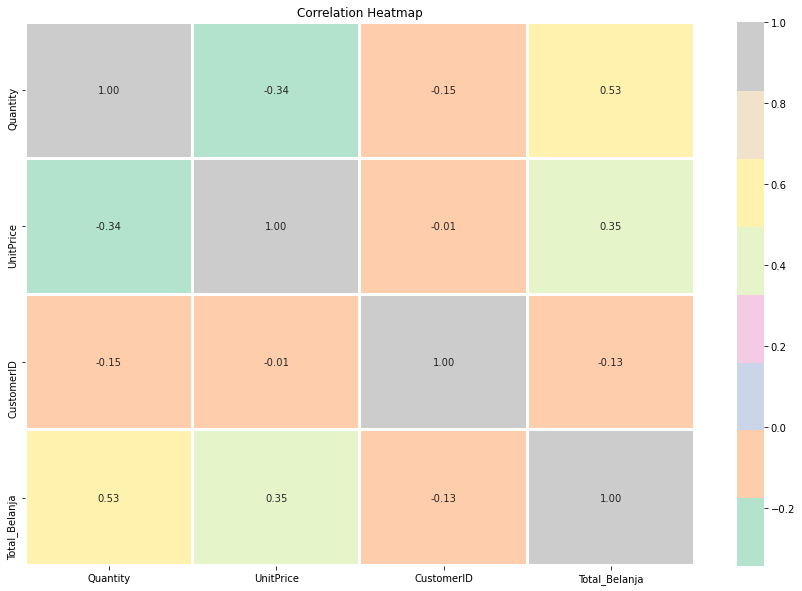

In [ ]:
numerikal = data[['Quantity', 'UnitPrice', 'CustomerID', 'Total_Belanja']]

plt.figure(figsize=(15, 10))

sns.heatmap(numerikal.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Observasi : <br>
- Pada kolom Quantity dan Total_belanja memiliki korelasi positif cukup kuat yaitu +0.53. Artinya, Semakin banyak kuantitas yang dibeli, cenderung semakin tinggi total belanjanya.
- Pada kolom UnitPrice dan Total_Belanja memiliki korelasi positif lemah yaitu 0.35. Artinya, kenaikan harga unit memiliki hubungan positif meskipun tidak terlalu kuat dengan total belanja
- Pada kolom UnitPrice dan CustomerID memiliki korelasi negatif yang tak berarti yaitu -0.01. Artinya tidak ada hubungan linear antara UnitPrice dengan CustomerID
- pada kolom Quantity dan CustomerID serta Total_belanja dan CustomerID memiliki korelasi negatif lemah yaitu sekitar -0.13 hingga -0.15. Artinya, kemungkinan ada kecerendungan pelanggan dengan ID tertentu membeli kuantitas lebih banyak atau sebaliknya